Importing necessary libraries

In [9]:
#importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os

Assigning path to training and test dataset

In [2]:
#paths to test data and training data
train_folder = '/Users/shreya/Documents/fork-it/Task3/Dataset_561.csv'
test_folder = '/Users/shreya/Documents/fork-it/Task3/TestDataset_561.csv'

Setting up

In [10]:
#loading train and test dataset
df_train = pd.read_csv(train_folder)
df_test = pd.read_csv(test_folder)

#seperating features and labels for training and test
X_train = df_train.iloc[:,:-2] #all columns except last two
y_train = df_train.iloc[:, -1] #last activity column

X_test = df_test.iloc[:,:-2] #all columns except last two
y_test = df_test.iloc[:, -1] #last activity column



Decision Tree Model Implementation

In [11]:
model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

Making the predictions

In [12]:
y_pred = model.predict(X_test)

Metrics Calculation

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

Printing the results

In [14]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
Confusion Matrix:
[[537   0   0   0   0   0]
 [  0 400  91   0   0   0]
 [  0 107 425   0   0   0]
 [  0   0   0 462  18  16]
 [  0   0   0  32 275 113]
 [  0   0   0  54  38 379]]


Visualize the Decision Tree

In [8]:
plt.figure(figsize=(100,100))
plot_tree(model,filled=True,feature_names=df_train.columns[:-2],class_names=model.classes_)
plt.title("Decision Tree Visualization")
plt.show()

Accuracy v/s Tree Depth

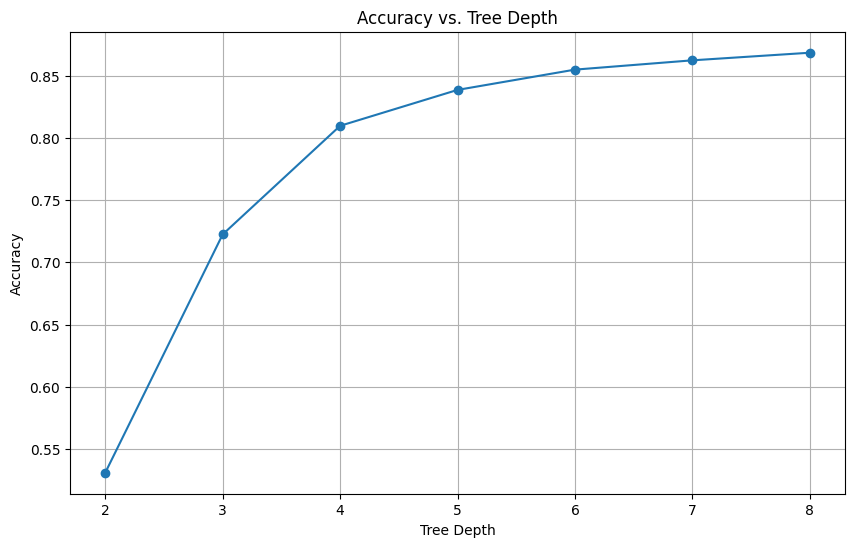

In [15]:
depths = range(2,9)
accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.grid(True)
plt.show()

In [16]:
plt.savefig('accuracy_vs_depth_model3.png')

<Figure size 640x480 with 0 Axes>